# 모델 훈련 (Model Training)

## 목표 

> 선형회귀 모델 훈련 

- 방식1 - `닫힌 형태 방정식`  : 훈련 세트에 가장 잘 맞는 모델 파라미터를 직접 계산 
- 방식2 - `경사 하강법` : 모델 파라미터를 조금씩 바꾸면서 비용 함수를 훈련 세트에 대해 최소화 

# 1. 선형 회귀 

## 1) 선형 회귀 모델의 예측 

- 선형 모델은 입력 특성의 가중치 합과 편향의 합 

$$
\hat{y} = \theta_0 + \theta_1 \cdot x_1 + \theta_2 \cdot x_2 + ... + \theta_n \cdot x_n
$$

- 예시 :   삶의 만족도와 1인당 GDP 사이의 선형회귀 모델 
$$
\text{}\text{삶의 만족도} = \theta_0 + \theta_1 \cdot \text{1인당 GDP}
$$

### 기회 읽는 방법

|기호|의미|읽는 법|
|---|---|---|
|$\hat{y}$|예측값|y 햇|
|$n$|특성의 수|n|
|$x_i$|n개 특성 중 i번째 특성| x i|
|$theta_j$| j번째 가중치 | 세타 j | 
|$theta_0$| 편향 혹은 절편 | 세타 0 |
 

#### 벡터 형태로 변경 
$$
\hat{y} = h_{\theta}(x) = \theta \cdot x
$$

|기호|의미|
|---|---|
|$\hat{y}$|예측값|
|$h_{\theta}(x)$| 가설 함수 - 이 함수에 x를 넣으면 예측값을 출력 |
|$\theta$| 특성 가중치 파라미터 벡터 - $theta$로 이뤄진 행렬|
|$x$|툭성 벡터 - $x_0 ~ x_n$을 담을 행렬|
|$\theta \cdot x$| $\theta$ 와 $x$의 점곱 - 선형모델과 동일|


## 2) 모델 훈련이란? 

> 훈련 세트에 가장 잘 맞도록 파라미터를 설정 하는 것 

- 예시 : $RMSE$ 
  - $RMSE$를 가장 최소화 하는 $\theta$값을 찾는 것 

# 2. 정규 방정식 
- 비용함수를 최소화 하는 `θ`를 구하는 방법

$$
\hat{\theta} = (X^TX)^{-1}X^Ty
$$

| 기호 | 의미 | 
|--|--|
|$\hat{\theta}$| 비용함수를 최소화 하는 $\theta$ 값|
|$y$|타겟 벡터 값|

## 데이터 생성 
- 샘플이 m개인 데이터 생성

In [3]:
import numpy as np

np.random.seed(42)

### 샘플 갯수 
m = 100

### 열 벡터 
X = 2 * np.random.rand(m, 1)

### 타겟 벡터
y = 4 + 3 * X + np.random.randn(m, 1)

## 비용함수를 최소화 하는 $\theta$ 값
- 넘파이의 `np.linalg`의 `inv` 함수로 역행렬 계산 -> $X^T$
- `np.dot`로 행렬 곱셈 / `@`도 점곱 수행 (단, 리스트는 사용 불가능)

In [4]:
from sklearn.preprocessing import add_dummy_feature

X_b = add_dummy_feature(X)
theta_best = np.linalg.inv(X_b.T @ X_b) @ X_b.T @ y

print("비용함수를 최소화 하는 theta 값 :", theta_best)

비용함수를 최소화 하는 theta 값 : [[4.21509616]
 [2.77011339]]


- 잡음 때문에 정확한 값을 재현하지 못함 
    - 실제 값은 $\theta_0 = 4 , \theta_1=3$
    - 하지만 예측 값은 $\theta_0 = 4.21 , \theta_1 = 2.77$


## 비용함수를 최소화 하는  $\hat{\theta}$로 모델 예측

#### 예측 실행
- X_new = 2행의 행렬을 생성 
- X_new_b : $x_1=0$ 추가 -> 첫번째 원소를 1로 만듦 
- 예측 데이터 x $\theta$를 예측값을 만듦

In [5]:
### 예측용 데이터 생성 

### 2x2 행렬 생성 
X_new = np.array([[0], [2]])
print("예측용 데이터 :", X_new)


### 더미 피쳐 추가  x0 = 1 추가 
### (1, x) 추가 
X_new_b = add_dummy_feature(X_new)
print("예측용 데이터 :", X_new_b)

### 예측값 계산
y_predict = X_new_b @ theta_best
print("예측값 :", y_predict)

예측용 데이터 : [[0]
 [2]]
예측용 데이터 : [[1. 0.]
 [1. 2.]]
예측값 : [[4.21509616]
 [9.75532293]]


#### 데이터 시각화를 위한 matplotlib 설정

In [6]:
import matplotlib.pyplot as plt

plt.rcParams['font.family'] ='Malgun Gothic'
plt.rcParams['axes.unicode_minus'] =False
plt.rc('font', size=14)
plt.rc('axes', labelsize=14, titlesize=14)
plt.rc('legend', fontsize=14)
plt.rc('xtick', labelsize=10)
plt.rc('ytick', labelsize=10)

#### 예측값 및 선형 회귀선 시각화

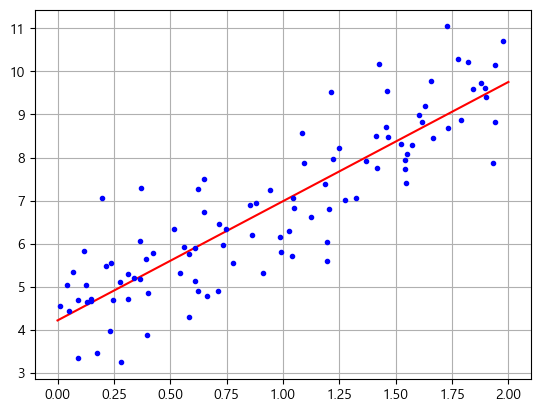

In [7]:
plt.plot(X_new, y_predict, "r-", label="예측")
plt.plot(X,y,"b.")
plt.grid()
plt.show()

## 사이킷 런으로 구현 
- `LinearRegression`은 `scipy.linalg.lstsq()`기반 -> 직접 호출도 가능 
- $\hat{\theta} = X^{+}y$ 를 계산 
  - $X^{+}$는 $X$의 유사역행렬 
  - `np.linalg.pinv()`로 유사역행렬을 직접 구할 수도 있음 
  - 유사 역행렬 자체는 `특이값 분해`에 사용됨  

- 객체 선언 후 fit으로 학습 
- `intercept_(편향)`와 `coef_(가중치)`를 저장


In [8]:
from sklearn.linear_model import LinearRegression

### 객체 생성
lin_reg = LinearRegression()

### 모델 학습
lin_reg.fit(X, y)
print("편향 :", lin_reg.intercept_)
print("가중치 :", lin_reg.coef_)

### 예측 실행
lin_reg.predict(X_new)

### 예측값
print("예측값 :", lin_reg.predict(X_new))

### lstsq 로 직접 호출
theta_best_svd, residuals, rank, s = np.linalg.lstsq(X_b, y, rcond=1e-6)
print("lstsq로 구한 theta 값 :", theta_best_svd)

### 유사 역행렬로 직접 구하기
np.linalg.pinv(X_b) @ y
print("유사 역행렬로 구한 theta 값 :", np.linalg.pinv(X_b) @ y)

편향 : [4.21509616]
가중치 : [[2.77011339]]
예측값 : [[4.21509616]
 [9.75532293]]
lstsq로 구한 theta 값 : [[4.21509616]
 [2.77011339]]
유사 역행렬로 구한 theta 값 : [[4.21509616]
 [2.77011339]]


## 계산의 복잡도 
### 정규방정식의 복잡도
- 정규방정식은 (n+1) * (n +1) 크기의 역행렬 계산 -> 계산 복잡도 : $O(n^{2.4}) \text{ 에서 }  O(n^3)$
- 특성이 2배 늘어날 수록 5.3배 ~ 8배 증가 

### LinearRegression 복잡도
- `LinearRegression` 복잡도 $O(n^{2})= 4배$ 
- 학습된 선형 회귀 모델 예측이 매우 빠름 


# 3. 경사하강법

## 1) 정의
> 비용함수를 최소화하기 위해 반복하여 파라미터를 조정해가는 것 

### 경사하강법 원리 
- 1단계 랜덤초기화 : 임의의 $\theta$ 값으로 시작 
- 2단계 그라디언트 계산 : 비용함수가 감소되는 방향으로 진행 

### 학습률 
-  학습률 : 학습의 스텝 -> 감소를 얼마나 할지 결정
- 학습률이 큰 경우 : 발산 -> 비효율
- 학습률이 작은 경우 : 수렴이 느림 -> 비효율 

### 최솟값
- 지역 최솟값 : 전체 최솟값이 아닌, 현재 위치에서 가장 낮은 지점
- 전역 최솟값 : 전체 최솟값

### 경사하강법의 문제 
- 랜덤초기화로 인해 전역 최솟값보다 지역 최솟값에 빠질 수 있음
- 지역 최솟값에 빠지면, 전역 최솟값을 찾지 못하거나 비효율적으
  - 선형회귀의 경우 볼록 함수 -> 지역 최솟값이 없음 
- 파라미터 공간 : 비용함수를 최소화 하는 모델 파라미터 조합 

## 2) 배치 경사 하강법 
- 경사하강법 : 모델 파라미터에 대해서 비용함수의 그레디언트(기울기)를 계산 
  - $\theta$ 가 변경될 때 비용 함수가 얼마나 바뀌는지 계산이 필요 -> `편도함수`
- 그레디언트가 커지는 방향 -> 반대방향으로 가야함 
  - $\theta - \nabla MSE(\theta)$
- 학습률 : $\eta$

- 경사하강법의 스텝  : $\theta^\text{next step} = \theta - \eta \nabla_{\theta}MSE(\theta)$

|기호|의미|
|---|---|
|$\nabla MSE(\theta)$| 변화하는 양|
|$\theta - \nabla MSE(\theta)$| 그레디언트 벡터의 반대 방향으로 움직임|
|$\eta$| 학습률| 
|$\theta^\text{next step} = \theta - \eta \nabla_{\theta}MSE(\theta)$|그레디언트 벡터의 반대 방향으로 학습률 만큼 움직임|


- 에포크(epoch) : 반복 횟수 

### 경사 하강법 구현 
- gradients = 비용함수를 최소화 하는 $\theta$를 구함 - $\hat{\theta} = (X^TX)^{-1}X^Ty$ 
- 학습률만큼 를 업데이트 함 $\theta$ (경사 하강함)

In [9]:
### 학습률
eta = 0.1

### 반복횟수 - 에포크 
n_epochs = 1000

### 샘플 갯수
m = len(X_b)

###  theta 무작위 초기화
np.random.seed(42)
theta = np.random.randn(2, 1)  

### 에포크 만큼 반복 시킴 
for epoch in range(n_epochs):
    ###  그레디언트 계산 
    gradients = 2/m * X_b.T @ (X_b @ theta - y)
    ###  theta 업데이트
    theta = theta - eta * gradients

print("경사하강법으로 구한 theta 값 :", theta)

경사하강법으로 구한 theta 값 : [[4.21509616]
 [2.77011339]]


### 적합한 파라미터 선택 
#### 학습률
- 적절한 학습률을 찾기 위해 `그리드 서치`를 사용 
  - 단, 시간이 너무 오래 걸릴 수 있기 때문에 `반복횟수`를 선정해야함

#### 반복횟수 
- 반복 횟수가 너무 적으면 `과소적합`이 발생 -> 학습이 되기 전에 멈춰버림 
- 반복 횟수가 너무 많으면 `과대적합`이 발생 -> 학습이 너무 많이 되어버림
  -> 반복횟수가 많이 하고, 그레디언트의 벡터가 무시 할 정도로 작아지면 (=`허용 오차`보다 작아지면) 알고리즘 중지

## 3) 확률적 경사 하강법 
### 1) 배치 경사 하강법의 문제 
- 전체 훈련 세트를 사용해 그레디언트 계산을 해야함 -> 훈련세트가 커지면 매우 느려짐 

### 2) 화률적 경사 하강법 
#### 장점 : 
- 한 번에 스텝에 샘플을 랜덤으로 처리
- 한 번에 필요한 샘플이 매우 적게 필요 -> 알고리즘이 확실히 빠름 

#### 단점 : 
- 알고리즘이 배치 보다 불안정함
- 무작위성 : 지역 최솟값에서 탈출 -> 전역 최솟값에 도달 못할 수도 있음
-> 딜레마를 해결 하는 방법 : 점진적으로 감소시키는 것 
  - 시작 할 때는 학습률 크기 , 점차 작게 감소시킴 -> `담금질 기법`
 - 매 번 `학습 스케줄`을 결정 


- 예시 ) 학습 스케줄을 사용한 경사하강법

실행 단계 
- 1단계 : 랜덤으로 인덱스 선택 
- 2단계 : 그레디언트 계산
- 3단계 : 학습률 계산 
- 4단계 : 그레디언트를 반대로 움직임

In [10]:
### 반복 횟수 
n_epochs =50 

### 학습 스케줄 파라미터 
t0, t1 = 5, 50

### 학습 스케줄 함수 생성 
def learning_schedule(t):
    return t0 / (t + t1)

### theta 무작위 초기화
np.random.seed(42)
theta = np.random.randn(2, 1)

### 에포크 만큼 반복 시킴
for epoch in range(n_epochs):
    ### 샘플 크기 만큼 반복 
    for iteration in range(m):
        ### 랜덤으로 샘플 선택 
        random_index = np.random.randint(m)
        ### 샘플 선택
        xi = X_b[random_index:random_index + 1]
        yi = y[random_index:random_index + 1]
        ### 그레디언트 계산
        gradients = 2 * xi.T @ (xi @ theta - yi)
        ### 학습률 계산
        eta = learning_schedule(epoch * m + iteration)
        ### theta 업데이트
        theta = theta - eta * gradients

print("확률적 경사하강법으로 구한 theta 값 :", theta)

확률적 경사하강법으로 구한 theta 값 : [[4.21076011]
 [2.74856079]]


- 에포크가 반속되면서 `모든 데이터`가 사용되지 않을 수 있음 
  - 모든 데이터를 선택하고 다음 에포크가 넘어가도록 할 수 있지만 결과가 더 향상되지 않음 

### 사이킷 런에서의 SGD 
- 사이킷 런에서는 기본적으로 SGDRegressor를 사용
  -SGDRegressor : 제곱 오차 비용 함수를 최적화함 

####  예시 
-`max_iter` :  최대  에포크 반복  - 1000
- `n_iter_no_change` :  에포크 반복 중 변화가 없을 때 반복 중지 - 10
- `tol` :  변화가 없을 때 변화량 - 1e-5
- `eta` :  학습률 - 0.01
- 규제는 사용하지 않음 `penalty=None`

In [11]:
from sklearn.linear_model import SGDRegressor

sgd_reg = SGDRegressor(max_iter=1000,  #### 최대 에포크 반복
                   tol=1e-5,  ### 변화가 없을 때 변화량
                     n_iter_no_change=100,  ### 에포크 반복 중 변화가 없을 때 반복 중지
                     penalty=None,  ### 규제 방법
                     eta0=0.01, ### 학습률 
                     random_state=42)

### fit() : 모델 학습
### y.ravel() : 1차원 배열로 변환
sgd_reg.fit(X, y.ravel())

print("편향 :", sgd_reg.intercept_)
print("가중치 :", sgd_reg.coef_)

편향 : [4.21278812]
가중치 : [2.77270267]


## 4) 미니 배치 경사 하강법 
- `미니 배치` : 임의의 작은 샘플을 이용하여 그레디언트를 계산 

### 장점 
- 행렬 연산에 최적화된 하드웨어를 사용해 성능을 향상 시킬 수 있음 
- 파라미터 공간에서 SGD보다 덜 불규칙적임 
- SGD보다는 최솟값에 더 가까이 도달하게 됨 

### 단점
- 지역 최솟값에 빠져나오기 더 힘들 수 있음 -> 적절한 학습 스케줄을 사용해야함 

- 선형 회귀를 사용한 알고리즘 비교 

|알고리즘|샘플(m)이 클 때|외부 메모리 학습지원|학습률$\eta$ 클 때 |하이퍼 파라미터 수| 스케일 조정 필요|사이킷런|
|---|---|---|---|---|---|---|
|정규 방정식|빠름|X|느림|0|X|N/A|
|SVD|빠름|X|느림|0|X|LinerRegression|
|배치 경사 하강법|느림|2|빠름|0|Y|N/A|
|확률적 경사 하강법|빠름|>=2|빠름|0|Y|SGDRegressor|
|미니배치 경사하강법|빠름|O|빠름|>=2|Y|N/A|

# 4. 다항 회귀 
> 비선형적인 데이터에 대한 선형 회귀 모델을 확장한 것

- 예시 : 2차 방정식 + 잡음 추가 

## 1) 다항 회귀 구현 

### 비선형 데이터 생성 
$y=ax^2+bx+c$  구현 

In [22]:
np.random.seed(42)

### 샘플 갯수
m = 100
### X , y 데이터 생성 
X = 6 * np.random.rand(m, 1) - 3
y = 0.5 * X ** 2 + X + 2 + np.random.randn(m, 1)

### PolynomialFeatures : 다항식 피쳐 생성
- 훈련 세트에 있는 특성을 제곱하여 새로운 특성 추가 

In [23]:
from sklearn.preprocessing import PolynomialFeatures

### 다항 특성 생성기
poly_features = PolynomialFeatures(degree=2, include_bias=False)
### fit_transform() : 다항 특성 생성 -> 제곱항을 추가함 
X_poly = poly_features.fit_transform(X)

### 다항 특성 생성 확인
print(f"첫번째 항 X[0] : {X[0]}'")
print(f"다항 특성이 추가된 첫번째 항 X_poly[0] : {X_poly[0]}'")

첫번째 항 X[0] : [-0.75275929]'
다항 특성이 추가된 첫번째 항 X_poly[0] : [-0.75275929  0.56664654]'


- 선형 회귀모델에 생성된 다항 특성을 적용 

In [24]:
### 선형 회귀 모델 생성
lin_reg = LinearRegression()

### 모델 학습 - 다항특성이 추가된 것으로 
lin_reg.fit(X_poly, y)

### 가중치 및 편향 확인 
print("편향 :", lin_reg.intercept_)
print("가중치 :",lin_reg.coef_)

편향 : [1.78134581]
가중치 : [[0.93366893 0.56456263]]


- 원래 의한 식 : $y=0.5x{_1}{^2}+1.0x{_1}+2.0+\text{가우스잡음}$
- 예측된 식 : $y=0.56x{_1}{^2}+0.93x{_1}+1.78+\text{가우스잡음}$

# 5. 학습 곡선
- 고차 다항 회귀 모델은 과대적합이 발생할 수 있음

## 과대적합 판단 
  - 일반화 성능을 판단하기 위한 방법 
    - `교차검증` : 교차검증 점수가 나쁘면 과대적합이 발생한 것
## 학습곡선 
- `학습곡선` : 모델의 훈련 오차와 검증 오차를 훈련 반복 횟수의 함수로 나타낸 그래프 
    - 훈련하는 동안 훈련 세트와 검증 세트에서 일정한 간격으로 모델 평가하고 그래프로 그림 
    - `learning_curve` 로 구현 가능
     - `exploit_incremental_learning=True` : 모델을 점진적으로 학습할 수 있도록 설정

- 예시 : 선형회귀모델의 학습곡선 그리기 

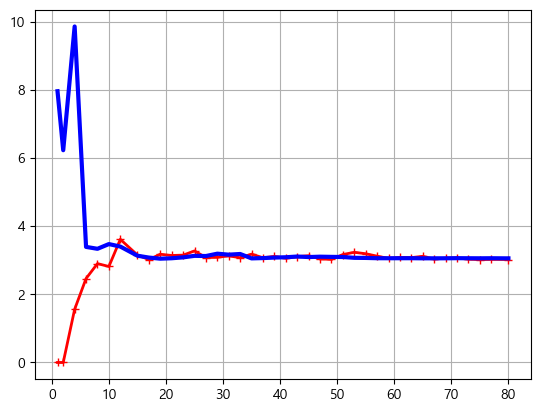

In [26]:
from sklearn.model_selection import learning_curve

train_sizes, train_scores, valid_scores = learning_curve(LinearRegression(), X,y,train_sizes=np.linspace(0.01, 1.0, 40),
                                                        cv=5, scoring="neg_mean_squared_error")

train_errors = -train_scores.mean(axis=1)
valid_errors = -valid_scores.mean(axis=1)

plt.plot(train_sizes, train_errors, "r-+", linewidth=2, label="훈련 세트")
plt.plot(train_sizes, valid_errors, "b-", linewidth=3, label="검증 세트")
plt.grid()
plt.show()

- 해당 모델은 `과소 적합`
- `훈련오차(빨간색)`
  - 샘플 갯수가 적을 수록 완벽하게 작동함 
  - 샘플 갯수가 추가될 수록 오차가 증가함 -> 평평해질 때까지 오차가 계속 상승 
  - 평평해진 상태 : 평균 오차가 더욱 나빠지거나 좋아지지 않음 
-`검증 오차 (파란색)`
   - 적은 샘플 : 일반화될 수 없어서 검증 오차가 매우 큼 
   - 훈련됨에 따라 검증 오차가 점점 감소함 
   - 오차가 완만하게 감소하며 훈련 세트의 그래프와 가까워짐 

- 예시 ) 10차 다항회귀 

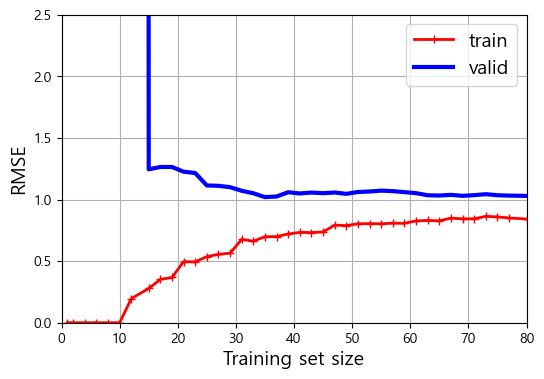

In [29]:
from sklearn.pipeline import make_pipeline

### 10차 다항식 생성 
polynomial_regression = make_pipeline(
    PolynomialFeatures(degree=10, include_bias=False),  
    LinearRegression() 
)

### 학습곡선 생성 
train_sizes, train_scores, valid_scores = learning_curve(
    polynomial_regression, X, y, train_sizes=np.linspace(0.01, 1.0, 40), cv=5,
    scoring="neg_root_mean_squared_error")

train_errors = -train_scores.mean(axis=1)
valid_errors = -valid_scores.mean(axis=1)

plt.figure(figsize=(6, 4))
plt.plot(train_sizes, train_errors, "r-+", linewidth=2, label="train")
plt.plot(train_sizes, valid_errors, "b-", linewidth=3, label="valid")
plt.legend(loc="upper right")
plt.xlabel("Training set size")
plt.ylabel("RMSE")
plt.grid()
plt.axis([0, 80, 0, 2.5])
plt.show()

- 훈련 데이터 오차가 낮아짐 
- 두 곡선 상 공간 -> 훈련데이터에서 모델이 더 나은 성능 -> 과대적합 모델 특징 

# 6. 규제가 있는 선형 회귀 모델
- `규제` : 과대적합을 줄이기 위해 모델을 규제하는 것 
  - 자유도를 줄이면 데이터가 과대적합되기 어려움 
  - 다항 회귀에서는 차수를 줄여 규제 가능 
  - 선형 회귀에서는 가중치를 제한함 

- 대표적인 방식 : `릿지`,`라쏘`, `엘라스틱넷`

## 1) 릿지  회귀 
> 규제가 추가된 선형 회귀 버전 

- $MSE$에 $\frac{a}{m}\sum^{n}_{i=1}\theta_{i}^{2}$ 가 추가됨 
  - 모델 가중치가 가능한 작게 유지되도록 함
  - 과대 적합 방지
- 훈련하는 동안만 `비용함수`에 추가 
- 훈련 완료 후에 성능 평가에서는 사용하지 않음 

### 릿지의 원리 
- $a$  : 모델을 얼마나 규제할지에 대한 `하이퍼파라미터`
  - $a=0$ 이면 릿지 회귀는 일반 선형 회귀와 동일
 - $a$ 가 커질수록 가중치가 0에 가까워짐 -> 데이터 평균을 지나는 수평선으로 변함 


#### 릿지 회귀 비용함수 
- $J(\theta) = MSE(\theta) + \frac{a}{m}\sum^{n}_{i=1}\theta_{i}^{2}$

- $\theta_0$ (편향) : 규제 대상이 아님 
- $\theta_i$ (가중치) : 규제 대상 
  - 규제항은 $a(||w||_2)^2$
    - $|| ||_2$ : 가중치 벡터의 $L2$노름 
    - 배치 경사하강법의 경우 MSE 그레디언트 벡터에 $2\alpha w/m$ 더함 

#### 릿지의 회귀 정규방정식 
$$
\hat{\theta} = (X^T \cdot X + \alpha \cdot A)^{-1} X^T \cdot y
$$
  - $A$ : 편향 

### 사이킷런을 통한 릿지 적용 

#### 정규 방정식 이용
- `solver="cholesky"` : 숄레스키 분해 

In [35]:
from sklearn.linear_model import Ridge

### 알파값이 0.1 + 숄레스키 분해 
ridge_reg = Ridge(alpha=0.1, solver="cholesky")

### 모델 학습
ridge_reg.fit(X, y)

### 예측 진행 
print("예측 값 : ",ridge_reg.predict([[1.5]]))


예측 값 :  [4.82899748]


#### SGD 사용시 릿지 적용 
- `penalty=l2` : 규제 함수로 L2를 사용

In [36]:
sgd_reg = SGDRegressor(penalty="l2",
                       alpha=0.1/m,  ### 알파값
                       tol= None,
                       max_iter=1000,
                       eta0=0.01,
                       random_state=42)

### 모델 학습 - y.ravel() : 1차원 배열로 변환
sgd_reg.fit(X, y.ravel())

### 예측 진행
print("예측 값 : ", sgd_reg.predict([[1.5]]))

예측 값 :  [4.82830117]


## 2) 라쏘 회귀
### 정의 
- 라쏘 회귀 처럼 규제항을 추가하지만 $l1$노름 응ㄹ 사용
  - $l1$ 노름 $2\alpha$을  곱함
  - $l2$ 노름은 $\frac{a}{m}$을 곱함
  - 이유 : 최적의 $\alpha$ 값이 훈련 세트의 크기와 무관하도록 하기 위함 

### 라쏘회귀비용 함수 
- $J(\theta) = MSE(\theta) + 2{a}\sum^{n}_{i=1}|\theta_{i}|$

### 특징 
- 덜 중요한 특성의 가중치를 제거하는 방식 
  - 가중치가 0로 변함 
  - 자동으로 특성 선택을 수행하고 희소모델을 만듦 (0이 아닌 특성의 가중치가 적음)

### 서브그레이언트 벡터 g
- 라쏘 비용함수는 $\theta_i=0$ 에서 미분이 가능하지 않음 -> 경사하강법에서는 미분을 해야함
- 대신 `서브그레디언트 벡터 g`를 이용하여 경사하강법에 적용 

### 사이킷런의 라쏘 회귀
- Lasso 대신 SGDRegressor(penelty="l1", alpha=0.1)

In [39]:
from sklearn.linear_model import Lasso
lasso_reg = Lasso(alpha=0.1)
lasso_reg.fit(X, y)
print(f"예측 값 : {lasso_reg.predict([[1.5]])}")

예측 값 : [4.77621741]


## 3) 엘라스틱넷 

### 정의
- 라쏘와 릿지를 절충한 모델 
- 규제항은 릿지와 라쏘를 더한 형태 + r을 통한 혼합비율 적용 
  - r-0 : 릿지 회귀
  - r-1 : 라쏘 회귀

### 엘라스틱넷 비용함수 
$J(\theta) = MSE(\theta) + r(2{a}\sum^{n}_{i=1}|\theta_{i}|) + (1-r) (\frac{a}{m}\sum^{n}_{i=1}\theta_{i}^{2})$

### 규제의 사용

|상황|규제|
|--|--|
|기본|릿지|
|유용한 특성이 몇가지만 있다면|라쏘 or 엘라스틱넷|
|특성 수가 훈련샘플 수보다 많거나 특성 몇개가 강하게 연관 있을 경우|엘라스틱넷|

- 대부분의 경우, 약간의 규제가 있는 것이 좋음 (일반적인 선형 회귀 지양)

### 사이킷런을 이용한 엘라스틱넷

In [40]:
from sklearn.linear_model import ElasticNet
elastic_net = ElasticNet(alpha=0.1, l1_ratio=0.5)
elastic_net.fit(X, y)
print(f"예측 값 : {elastic_net.predict([[1.5]])}")

예측 값 : [4.78114505]


## 4) 조기 종료 
### 정의
- 검증 오차가 최솟값에 도달하면 바로 훈련을 중지 
    -  에포크가 진행될 수록 훈련 세트/학습 세트 오차가 줄어듦
    - 그러다 검증세트에 대한 오차가 상승 -> 과대적합 시작 

### 사이킷런을 이용한 조기종료 
- `partial_fit` : 점진적인 학습 
- `copy.deepcopy()` : 모델을 복사 
- `sklearn.base.clone()` : 모델의 하이퍼파라미터만 복사

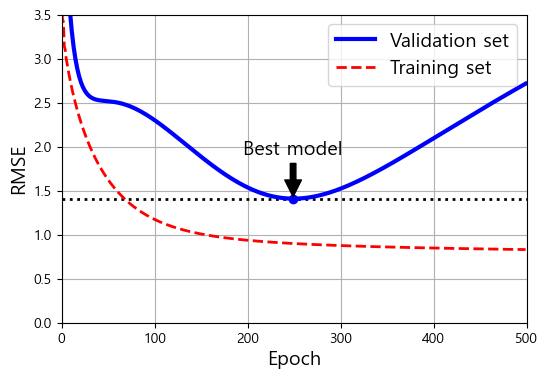

In [43]:
from copy import deepcopy
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler

np.random.seed(42)
m = 100
X = 6 * np.random.rand(m, 1) - 3
y = 0.5 * X ** 2 + X + 2 + np.random.randn(m, 1)
X_train, y_train = X[: m // 2], y[: m // 2, 0]
X_valid, y_valid = X[m // 2 :], y[m // 2 :, 0]

preprocessing = make_pipeline(PolynomialFeatures(degree=90, include_bias=False),
                              StandardScaler())
X_train_prep = preprocessing.fit_transform(X_train)
X_valid_prep = preprocessing.transform(X_valid)
sgd_reg = SGDRegressor(penalty=None, eta0=0.002, random_state=42)
n_epochs = 500
best_valid_rmse = float('inf')
train_errors, val_errors = [], []  

for epoch in range(n_epochs):
    sgd_reg.partial_fit(X_train_prep, y_train)
    y_valid_predict = sgd_reg.predict(X_valid_prep)
    val_error = np.sqrt(mean_squared_error(y_valid, y_valid_predict))
    if val_error < best_valid_rmse:
        best_valid_rmse = val_error
        best_model = deepcopy(sgd_reg)

    y_train_predict = sgd_reg.predict(X_train_prep)
    train_error = np.sqrt(mean_squared_error(y_train, y_train_predict))
    val_errors.append(val_error)
    train_errors.append(train_error)

best_epoch = np.argmin(val_errors)
plt.figure(figsize=(6, 4))
plt.annotate('Best model',
             xy=(best_epoch, best_valid_rmse),
             xytext=(best_epoch, best_valid_rmse + 0.5),
             ha="center",
             arrowprops=dict(facecolor='black', shrink=0.05))
plt.plot([0, n_epochs], [best_valid_rmse, best_valid_rmse], "k:", linewidth=2)
plt.plot(val_errors, "b-", linewidth=3, label="Validation set")
plt.plot(best_epoch, best_valid_rmse, "bo")
plt.plot(train_errors, "r--", linewidth=2, label="Training set")
plt.legend(loc="upper right")
plt.xlabel("Epoch")
plt.ylabel("RMSE")
plt.axis([0, n_epochs, 0, 3.5])
plt.grid()
plt.show()

# 7. 로지스틱 회귀 
## 1) 정의 
- 로지스틱 회귀는 선형 회귀의 확장으로, 종속 변수(타겟)가 범주형일 때 사용됩니다.
-> `회귀`이지만 `분류`문제로 사용 가능

### 원리 
- 추정 확률이 임계값보다 크면 -> 양성 클래스 (해당 클래스가 맞음)
- 추정 확률이 임계값보다 작으면 -> 음성 클래스 (해당 클래스가 아님)

## 2) 확률 추정 
- 로지스틱 회귀는 입력 특성의 가중치 합을 계산 -> 바로 결과를 출력하지 않고 `로지스틱`을 출력 

### 로지스틱 회귀모델의 확률 추정식 
$$
\hat{p} = h_{\theta}(x) = \sigma(\theta^T x)
$$

- `로지스틱`$\sigma(t)$는 `시그모이드 함수`
  - $\sigma(t) = \frac{1}{1 + exp(-t)}$

### 추정식을 이용한 예측 
- 위의 식을 통해 $\hat{p}$로 `양성 클래스에 속할 확률`을 추정 
  \begin{cases} 
$$
\begin{cases} 
\hat{y} = 0 (\hat{p} < 0.5) \\
\hat{y} = 1 (\hat{p} >= 0.5)
\end{cases}
$$

## 3) 훈련과 비용 함수 
### 훈련 방법 
- 훈련의 목적 : 양성 샘플($\hat{y}=1$)에 대해서 높은 확률을 추정 , 음성 샘플은 낮게 추정 하는 모델 파라미터 $\theta$를 출력 

### 훈련 함수식 
$$
c(\theta) =
\begin{cases} 
-log(\hat{p})  \text{양성클래스 일때 (y=1)} \\
-log(1-\hat{p})  \text{음성클래스 일때 (y=0)} 
\end{cases}
$$

- t가 0에 가까워지면 `-log(t)`가 커짐 -> 양성 클래스로 판단 
- t가 1에 가까워지면 `-log(1-t)`가 커짐 -> 음성 클래스로 판단

### 비용함수 
- 모든 훈련 샘플의 비용을 평균한 것 (로그 손실)

$$
j(\theta) =  - \frac{1}{m} \displaystyle\sum^m_{i=1}[y^{(i)}log(\hat{p}^{(i)})+(1-y^{(i)})log(1-\hat{p}^{(i)})]
$$

- 아직은 비용함수의 최솟값을 계산하는 알려진 해가 없음 
  - 함수의 형태가 볼록함수 -> 경사하강법 사용시 전역 최솟값을 찾는것을 보장함 

## 4) 결정 경계 
- 분류를 결정하는 경계
- 붓꽃 데이터셋을 이용한 분류 

### 분류기 생성
- 꽃잎 너비를 기반으로 `iris-Versicolor` 종 감지 분류기

### 데이터 로드

In [46]:
from sklearn.datasets import load_iris

iris = load_iris(as_frame=True)
print(f"list(iris) : {list(iris)}")
print(f"iris.data : {iris.data.head(3)}")
print(f"iris.target : {iris.target.head(3)}")
print(f"iris.target_names : {iris.target_names}")

list(iris) : ['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module']
iris.data :    sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0                5.1               3.5                1.4               0.2
1                4.9               3.0                1.4               0.2
2                4.7               3.2                1.3               0.2
iris.target : 0    0
1    0
2    0
Name: target, dtype: int64
iris.target_names : ['setosa' 'versicolor' 'virginica']


### 로지스틱 회귀 모델을 훈련

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

X = iris.data[["petal width (cm)"]].values
y = iris.target_names[iris.target] == 'virginica'
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

log_reg = LogisticRegression(random_state=42)
log_reg.fit(X_train, y_train)

LogisticRegression(random_state=42)

### 꽃잎 너비가 0~3cm 꽃인 모델의 추정 확률을 계산 

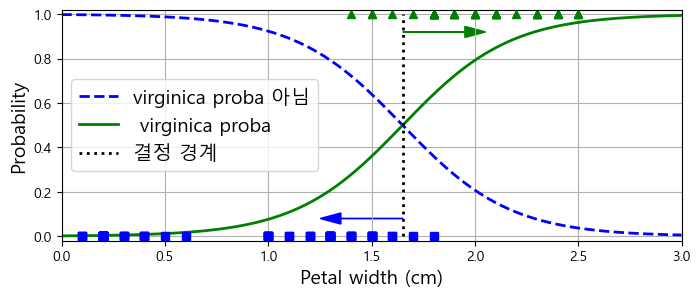

In [59]:
X_new = np.linspace(0, 3, 1000).reshape(-1, 1)  # 크기를 바꾸어 열 벡터를 얻습니다.
y_proba = log_reg.predict_proba(X_new)
decision_boundary = X_new[y_proba[:, 1] >= 0.5][0, 0]

plt.figure(figsize=(8, 3)) 
plt.plot(X_new, y_proba[:, 0], "b--", linewidth=2,
         label="virginica proba 아님")
plt.plot(X_new, y_proba[:, 1], "g-", linewidth=2, label=" virginica proba")
plt.plot([decision_boundary, decision_boundary], [0, 1], "k:", linewidth=2,
         label="결정 경계")


plt.arrow(x=decision_boundary, y=0.08, dx=-0.3, dy=0,
          head_width=0.05, head_length=0.1, fc="b", ec="b")
plt.arrow(x=decision_boundary, y=0.92, dx=0.3, dy=0,
          head_width=0.05, head_length=0.1, fc="g", ec="g")
plt.plot(X_train[y_train == 0], y_train[y_train == 0], "bs")
plt.plot(X_train[y_train == 1], y_train[y_train == 1], "g^")
plt.xlabel("Petal width (cm)")
plt.ylabel("Probability")
plt.legend(loc="center left")
plt.axis([0, 3, -0.02, 1.02])
plt.grid()


plt.show()

- iris-virginica는 꽃잎 1.4~2.5cm 사이 분포 
- 아닌 경우 : 0.1~1.8cm 분포 -> 약간의 겹침이 있음
-> 1cm 미만이면 확실히 아님 
-> `predict()`를 이용하면 가장 가능성이 높은 클래스를 출력함 

In [61]:
print("결정 경계 :", decision_boundary)
print("1.7cm 와 1.5cm 분류 : ",log_reg.predict([[1.7],[1.5]]))

결정 경계 : 1.6516516516516517
1.7cm 와 1.5cm 분류 :  [ True False]


## 5) 소프트맥스 회귀 

### 정의
- 여러 개의 이진 분류기를 훈련 시키는 방식이 아닌 `다중 클래스를 지원한 분류기`
- `소프트맥스 회귀` 혹은 `다중 클래스 로지스틱 회귀`

#### 개념 
- 샘플 `x`가 클래스 `k`에대한 점수 $s_k(x)$-> 소프트맥수 함수(혹은 정규화된 지수함수) 적용 ->클래스 확률 추정

#### 클래스 k에 대한 소프트맥수 점수 함수
$s_k(x) = (\theta^{(k)})^Tx$
- $\theta^{(k)}$ :  클래스 k의 파라미터 벡터 
- $\Theta$ : 파라미터 행렬 
  - $\theta^{(k)}$의 행렬 

- 점수가 계산되면 소프트 맥스 함수에 통과 시킴 
  - 소프트 맥스 함수 $\hat{p}_k =\sigma(s(x))_k = \frac{exp(s_k(x))}{\sum^K_{j=1}exp(s_j(x))}$
- 클래스 k에 해당할 확률 $\hat{p}_k$를 구함 
- 점수를 정규화 -> `로그-오즈` 혹은 `로짓`

### 소프트맥스 회귀 분류기의 예측 
$\hat{y} = argmax((\theta^{k})^Tx)$
- argmax 연산 함수를 최대화 하는 변수 값을 반환 -> 추정확률이 최대인 k 값을 반환 


### 훈련 방법 
- 목표 : 모델이 타깃 클래스에 대해 높은 확률을 추정하도록 하는것 
  - `크로스 엔트로피` 비용 함수를 최소화 = 낮은 확률을 예측하는 것을 억제 

#### 크로스엔트로피 비용함수

$$
J(\theta) = - \frac{1}{m} \sum_{i=1}^{m} \sum_{k=1}^{K} y_{i,k} \log(\hat{y}_{i,k})
$$

- $y_{i,k}$ : i번째 샘플이 클래스 k에 속할 확률 -> 1 혹은 0 
- 클래스가 2개면 로지스틱 회귀의 비용함수와 동일함 


#### 크로스엔트로피 그레디언트 벡터 
$$
\nabla_{\theta,(k)} J(\Theta) = \frac{1}{m}\sum^{m}_{i=1}(\hat{p_{k}^(i)}-y_k^{(i)})x^{(i)}
$$

### 사이킷 런에서 구현 
- LogisticRegression에서 클래스가 2개 이상 일 때, `소프트맥스`로 계산 
  - multi_class를 `multinomial`바꾸면 소프트맥스 회귀로 사용가능 
  - solver 는 `lbfgs`같은 소프트맥스 회귀를 지원하는 알고리즘으로 바꿔야함 

In [64]:
X = iris.data[["petal length (cm)", "petal width (cm)"]].values
y = iris["target"]
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

softmax_reg = LogisticRegression(C=30, random_state=42)
softmax_reg.fit(X_train, y_train)

print("예측 값 :", softmax_reg.predict([[5, 2]]))
print("예측 확률 :", softmax_reg.predict_proba([[5, 2]]).round(2))

예측 값 : [2]
예측 확률 : [[0.   0.04 0.96]]
